[[11 15 '66/5' ... 5 3 25]
 [13 15 '73/5' ... 5 3 21]
 [9 15 '66/5' ... 5 3 30]
 ...
 [11 15 '67/5' ... 5 3 7]
 [11 15 '69/5' ... 5 4 1]
 [13 15 '72/5' ... 5 4 2]]

[[11.  15.  13.2 ...  5.   3.  25. ]
 [13.  15.  14.6 ...  5.   3.  21. ]
 [ 9.  15.  13.2 ...  5.   3.  30. ]
 ...
 [11.  15.  13.4 ...  5.   3.   7. ]
 [11.  15.  13.8 ...  5.   4.   1. ]
 [13.  15.  14.4 ...  5.   4.   2. ]]
[[29]
 [20]
 [23]
 ...
 [25]
 [21]
 [28]]
[[226]
 [181]
 [ 82]
 ...
 [ 99]
 [156]
 [143]]
0.06509477006994857


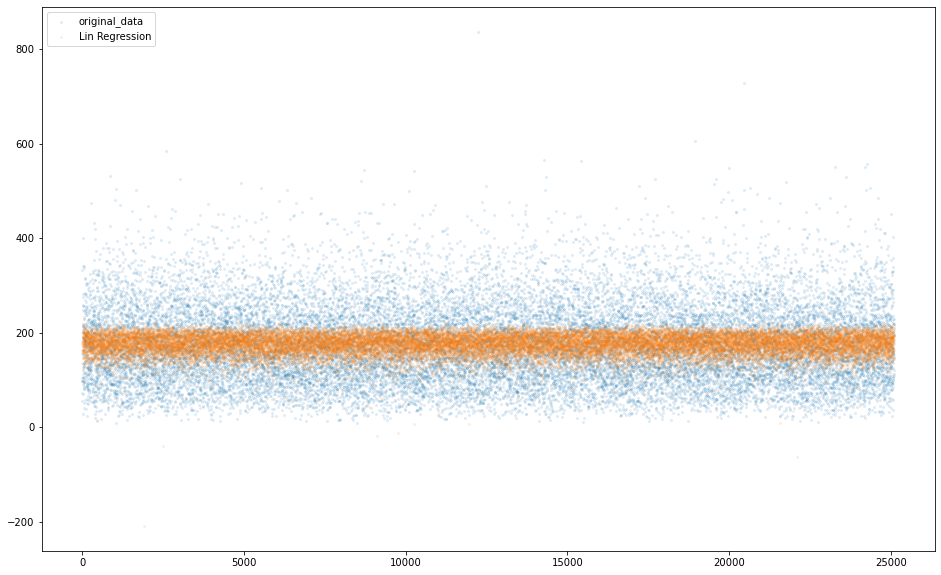

Metal device set to: Apple M1
Epoch 1/100


2022-08-18 11:57:20.271975: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-08-18 11:57:20.272139: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2022-08-18 11:57:20.369252: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2022-08-18 11:57:20.369671: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


  1/199 [..............................] - ETA: 1:36 - loss: 176.8441 - r_square: -4.7902

2022-08-18 11:57:20.714348: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


199/199 [==============================] - 3s 11ms/step - loss: 68.1021 - r_square: -0.2898 - val_loss: 68.0382 - val_r_square: -0.2058
Epoch 2/100
  1/199 [..............................] - ETA: 3s - loss: 61.7009 - r_square: 0.0339

2022-08-18 11:57:22.894562: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


199/199 [==============================] - 2s 10ms/step - loss: 60.9719 - r_square: 0.0401 - val_loss: 68.4905 - val_r_square: -0.2261
Epoch 3/100
199/199 [==============================] - 2s 10ms/step - loss: 60.7415 - r_square: 0.0474 - val_loss: 68.0889 - val_r_square: -0.2089
Epoch 4/100
199/199 [==============================] - 2s 10ms/step - loss: 60.7135 - r_square: 0.0491 - val_loss: 66.8739 - val_r_square: -0.1671
Epoch 5/100
199/199 [==============================] - 2s 10ms/step - loss: 60.6166 - r_square: 0.0519 - val_loss: 68.1049 - val_r_square: -0.2108
Epoch 6/100
199/199 [==============================] - 2s 10ms/step - loss: 60.5752 - r_square: 0.0535 - val_loss: 67.4158 - val_r_square: -0.1854
Epoch 7/100
199/199 [==============================] - 2s 10ms/step - loss: 60.6192 - r_square: 0.0528 - val_loss: 65.0619 - val_r_square: -0.1088
Epoch 8/100
199/199 [==============================] - 2s 10ms/step - loss: 60.5159 - r_square: 0.0546 - val_loss: 65.0622 - val_r

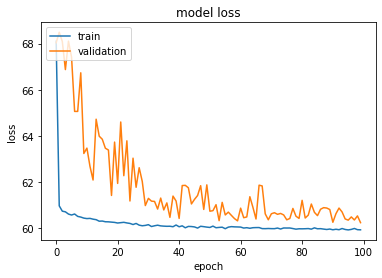

2022-08-18 12:00:38.247346: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


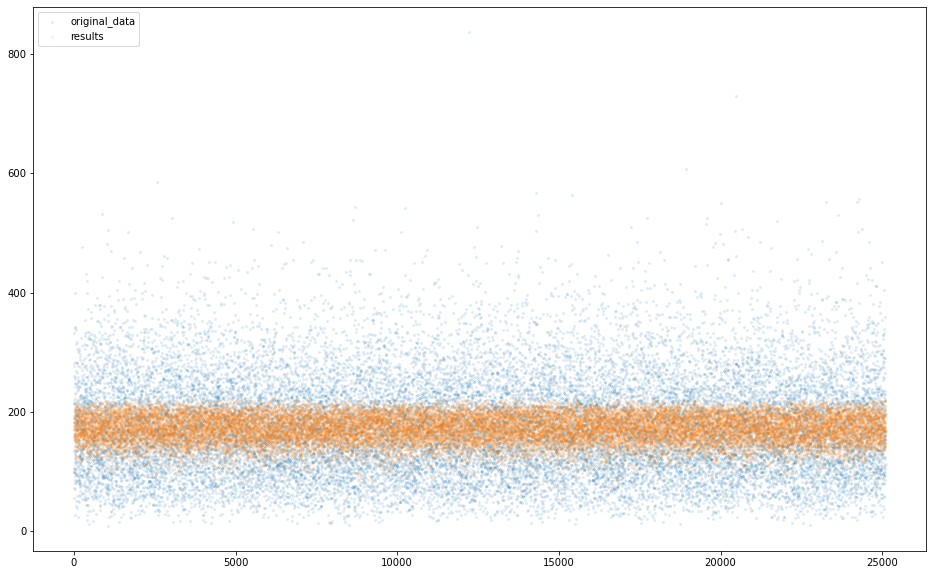

[[ 14.27020264]
 [127.50305176]
 [ 54.83132935]
 ...
 [ -9.32977295]
 [-29.25074768]
 [ 55.07223511]]


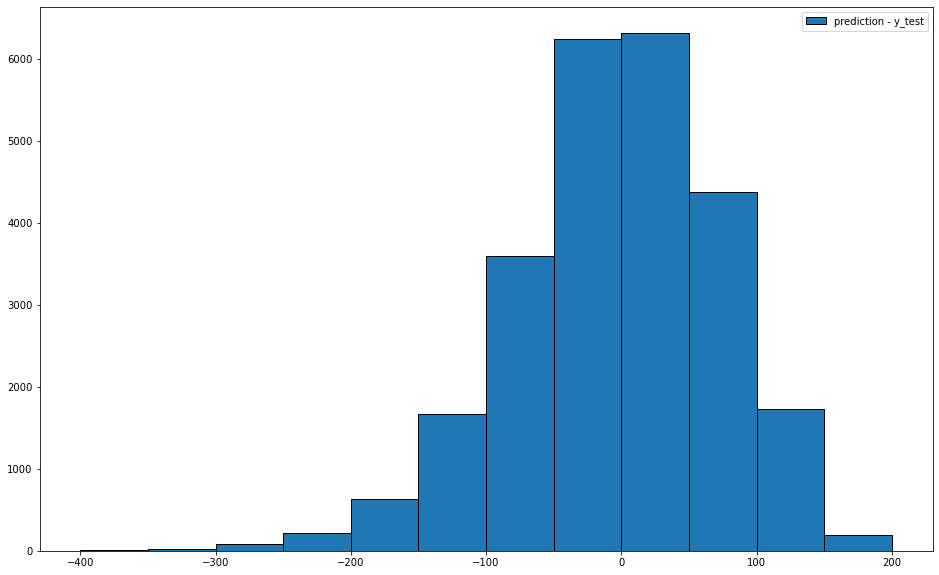

In [4]:
# Data cleaning
import tensorflow as tf
from tensorflow import initializers
import numpy as np
import pandas as pd
import tensorflow_addons as tfa
from sklearn.model_selection import train_test_split
from sklearn.utils import class_weight
import matplotlib.pyplot as plt
import sklearn
from fractions import Fraction

# variables
n = 7 # number of features

df = pd.read_csv('/Users/erickang/Documents/Research/Data/RandomBinomialDataSet.5vars.deg15.5binomialsEach.features.txt', header=0)
answers = pd.read_csv('/Users/erickang/Documents/Research/Data/RandomBinomialDataSet.5vars.deg15.5binomialsEach.gbMaxDeg.txt', header=None)

X = np.array(df)
print(X)
print()
for i in range(len(X)):
    for j in range(len(X[i])):
        if isinstance(X[i][j], str):
            X[i][j] = float(Fraction(X[i][j]))
X = np.asarray(X).astype('float32')
print(X)

y = np.array(answers)
print(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)


# Features predicting Sizes
df = pd.read_csv('/Users/erickang/Documents/Research/Data/RandomBinomialDataSet.5vars.deg15.5binomialsEach.features.txt', header=0)
answers = pd.read_csv('/Users/erickang/Documents/Research/Data/RandomBinomialDataSet.5vars.deg15.5binomialsEach.gbSizes.txt', header=None)

y = np.array(answers)
print(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)


# Features predicting Sizes LinRegression
from sklearn.linear_model import LinearRegression

regr = LinearRegression()

regr.fit(X_train, y_train)
print(regr.score(X_test, y_test))

output = regr.predict(X_test)
x_axis = range(y_test.size)

plt.figure(figsize=(16,10))
plt.scatter(x_axis, y_test, label = "original_data", alpha=0.1, s=4)
plt.scatter(x_axis, output, label = "Lin Regression", alpha=0.1, s=4)
plt.legend(loc="upper left")
plt.show()


# Features predicting Sizes Neural Network
initializer = initializers.RandomNormal(stddev=0.1)
b_initializer = initializers.Zeros()

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(300,
                                kernel_initializer=initializer,
                                bias_initializer=b_initializer,
                                activation=tf.nn.relu))
model.add(tf.keras.layers.Dropout(.5))
model.add(tf.keras.layers.Dense(300,
                                kernel_initializer=initializer,
                                bias_initializer=b_initializer,
                                activation=tf.nn.relu))
model.add(tf.keras.layers.Dropout(.5))
model.add(tf.keras.layers.Dense(300,
                                kernel_initializer=initializer,
                                bias_initializer=b_initializer,
                                activation=tf.nn.relu))
model.add(tf.keras.layers.Dropout(.5))

model.add(tf.keras.layers.Dense(1, activation=tf.nn.relu))

model.compile(optimizer='adam',
             loss='log_cosh',
             metrics=[tfa.metrics.RSquare(dtype=tf.float32)])

history = model.fit(X_train, y_train, 
                    batch_size=1024, epochs = 100, validation_split=0.1)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

output = model.predict(X_test)
x_axis = range(y_test.size)

plt.figure(figsize=(16,10))
plt.scatter(x_axis, y_test, label = "original_data", alpha=0.1, s=4)
plt.scatter(x_axis, output, label = "results", alpha=0.1, s=4)
plt.legend(loc="upper left")
plt.show()

estimate_delta = output - y_test
print(estimate_delta)

plt.figure(figsize=(16,10))
plt.hist(estimate_delta, bins=12, range=(-400,200), edgecolor='black', label='prediction - y_test')
plt.legend()

[[11 15 '66/5' ... 5 3 25]
 [13 15 '73/5' ... 5 3 21]
 [9 15 '66/5' ... 5 3 30]
 ...
 [11 15 '67/5' ... 5 3 7]
 [11 15 '69/5' ... 5 4 1]
 [13 15 '72/5' ... 5 4 2]]

[[11.  15.  13.2 ...  5.   3.  25. ]
 [13.  15.  14.6 ...  5.   3.  21. ]
 [ 9.  15.  13.2 ...  5.   3.  30. ]
 ...
 [11.  15.  13.4 ...  5.   3.   7. ]
 [11.  15.  13.8 ...  5.   4.   1. ]
 [13.  15.  14.4 ...  5.   4.   2. ]]
[[29]
 [20]
 [23]
 ...
 [25]
 [21]
 [28]]
0.024172655540689814


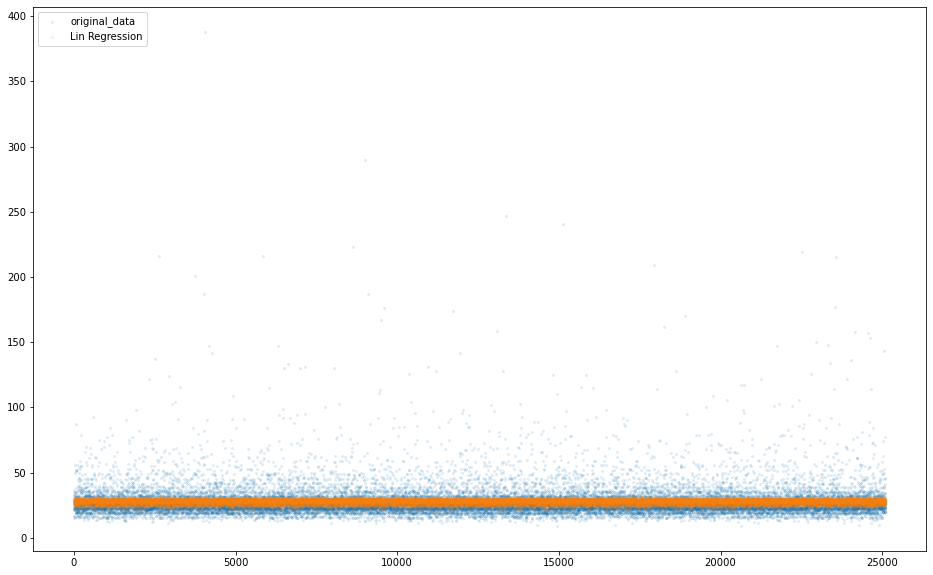

Epoch 1/150
  4/199 [..............................] - ETA: 3s - loss: 17.8946 - r_square: -2.6705 

2022-08-18 12:16:21.155042: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


199/199 [==============================] - 2s 11ms/step - loss: 6.5545 - r_square: -0.2927 - val_loss: 13.6602 - val_r_square: -1.6469
Epoch 2/150
  1/199 [..............................] - ETA: 3s - loss: 5.9969 - r_square: -0.0155

2022-08-18 12:16:23.236445: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


199/199 [==============================] - 2s 10ms/step - loss: 5.4313 - r_square: -0.0408 - val_loss: 13.7632 - val_r_square: -1.6695
Epoch 3/150
199/199 [==============================] - 2s 10ms/step - loss: 5.4005 - r_square: -0.0340 - val_loss: 13.3728 - val_r_square: -1.5795
Epoch 4/150
199/199 [==============================] - 2s 10ms/step - loss: 5.3652 - r_square: -0.0282 - val_loss: 13.2111 - val_r_square: -1.5412
Epoch 5/150
199/199 [==============================] - 2s 10ms/step - loss: 5.3535 - r_square: -0.0272 - val_loss: 13.3395 - val_r_square: -1.5715
Epoch 6/150
199/199 [==============================] - 2s 10ms/step - loss: 5.3398 - r_square: -0.0246 - val_loss: 12.6143 - val_r_square: -1.4077
Epoch 7/150
199/199 [==============================] - 2s 10ms/step - loss: 5.3352 - r_square: -0.0234 - val_loss: 12.1431 - val_r_square: -1.3046
Epoch 8/150
199/199 [==============================] - 2s 10ms/step - loss: 5.3231 - r_square: -0.0215 - val_loss: 12.2765 - val_r

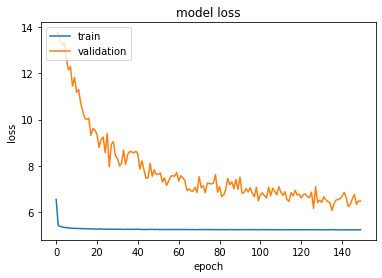

2022-08-18 12:21:19.561968: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


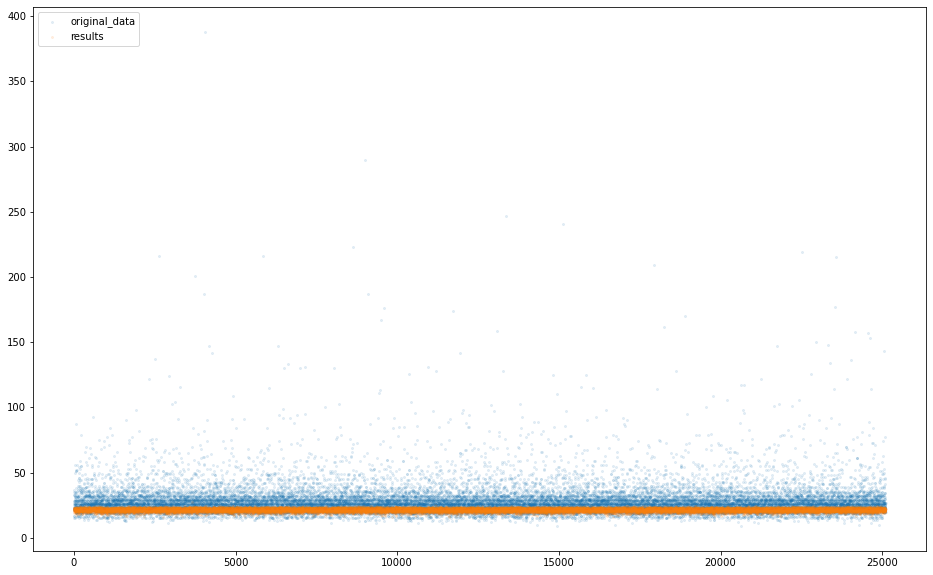

[[-4.27091599]
 [ 3.91111755]
 [ 0.82424927]
 ...
 [-9.74391365]
 [ 2.27726746]
 [-4.89564896]]


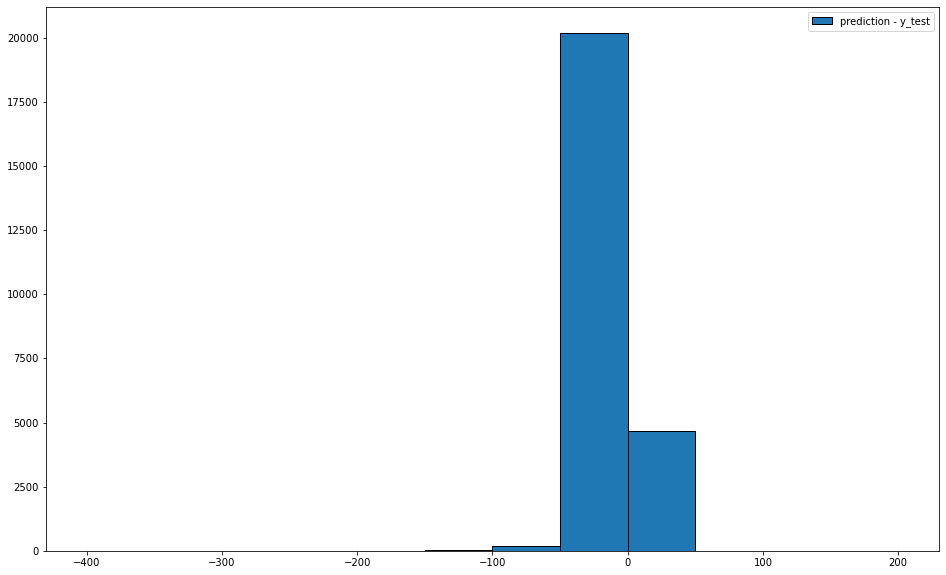

In [5]:
# Data cleaning
import tensorflow as tf
from tensorflow import initializers
import numpy as np
import pandas as pd
import tensorflow_addons as tfa
from sklearn.model_selection import train_test_split
from sklearn.utils import class_weight
import matplotlib.pyplot as plt
import sklearn
from fractions import Fraction

# variables
n = 7 # number of features

df = pd.read_csv('/Users/erickang/Documents/Research/Data/RandomBinomialDataSet.5vars.deg15.5binomialsEach.features.txt', header=0)
answers = pd.read_csv('/Users/erickang/Documents/Research/Data/RandomBinomialDataSet.5vars.deg15.5binomialsEach.gbMaxDeg.txt', header=None)

X = np.array(df)
print(X)
print()
for i in range(len(X)):
    for j in range(len(X[i])):
        if isinstance(X[i][j], str):
            X[i][j] = float(Fraction(X[i][j]))
X = np.asarray(X).astype('float32')
print(X)

y = np.array(answers)
print(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)


# Features predicting MaxDeg LinRegression
from sklearn.linear_model import LinearRegression

regr = LinearRegression()

regr.fit(X_train, y_train)
print(regr.score(X_test, y_test))

output = regr.predict(X_test)
x_axis = range(y_test.size)

plt.figure(figsize=(16,10))
plt.scatter(x_axis, y_test, label = "original_data", alpha=0.1, s=4)
plt.scatter(x_axis, output, label = "Lin Regression", alpha=0.1, s=4)
plt.legend(loc="upper left")
plt.show()


# Features predicting MaxDeg Neural Network
initializer = initializers.RandomNormal(stddev=0.1)
b_initializer = initializers.Zeros()

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(300,
                                kernel_initializer=initializer,
                                bias_initializer=b_initializer,
                                activation=tf.nn.relu))
model.add(tf.keras.layers.Dropout(.5))
model.add(tf.keras.layers.Dense(300,
                                kernel_initializer=initializer,
                                bias_initializer=b_initializer,
                                activation=tf.nn.relu))
model.add(tf.keras.layers.Dropout(.5))
model.add(tf.keras.layers.Dense(300,
                                kernel_initializer=initializer,
                                bias_initializer=b_initializer,
                                activation=tf.nn.relu))
model.add(tf.keras.layers.Dropout(.5))

model.add(tf.keras.layers.Dense(1, activation=tf.nn.relu))

model.compile(optimizer='adam',
             loss='log_cosh',
             metrics=[tfa.metrics.RSquare(dtype=tf.float32)])

history = model.fit(X_train, y_train, 
                    batch_size=1024, epochs = 150, validation_split=0.1)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

output = model.predict(X_test)
x_axis = range(y_test.size)

plt.figure(figsize=(16,10))
plt.scatter(x_axis, y_test, label = "original_data", alpha=0.1, s=4)
plt.scatter(x_axis, output, label = "results", alpha=0.1, s=4)
plt.legend(loc="upper left")
plt.show()

estimate_delta = output - y_test
print(estimate_delta)

plt.figure(figsize=(16,10))
plt.hist(estimate_delta, bins=12, range=(-400,200), edgecolor='black', label='prediction - y_test')
plt.legend()